<a href="https://colab.research.google.com/github/nikensfra/Statistika-Multivariat/blob/main/STATMUL_TURF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TURF

In [1]:
#Install Library
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.9 MB/s eta 0:00:00


In [8]:
df = pd.read_csv('/content/dataset_turf_saluran_promosi_250.csv')
df.head()

,Responden,Instagram,TikTok,YouTube,TV,Radio,Billboard
0,R1,0,0,0,1,1,0
1,R2,0,0,0,0,0,1
2,R3,1,1,0,0,0,1
3,R4,0,1,0,0,0,0
4,R5,1,0,0,0,0,0


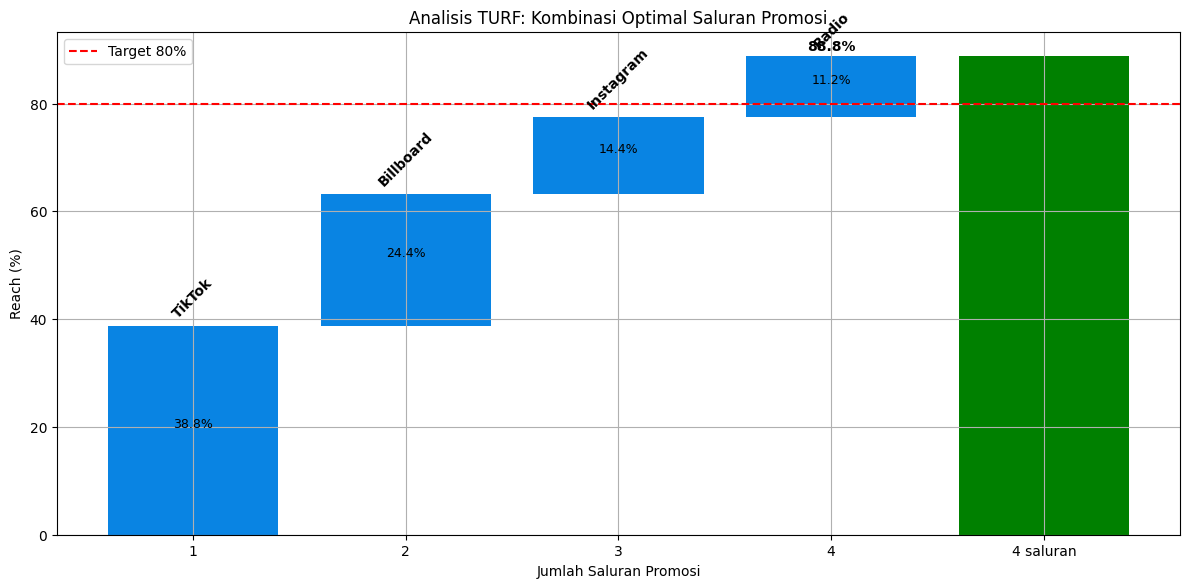

Untuk mencapai target 80%:
✅ Jumlah saluran diperlukan: 4
✅ Saluran terpilih: ['TikTok', 'Billboard', 'Instagram', 'Radio']
✅ Total reach tercapai: 88.80%


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# BACA FILE
file_path = "dataset_turf_saluran_promosi_250.csv"
df = pd.read_csv(file_path)
df.set_index("Responden", inplace=True)

# PARAMETER TARGET REACH
target_pct = 0.80  # 80%
target_reach = int(target_pct * len(df))

# Hitung reach tiap saluran
reach_per_channel = df.sum().sort_values(ascending=False)

# Greedy algorithm
selected = []
current_reach = set()
reach_progress = []

for channel in reach_per_channel.index:
    new_reach = current_reach | set(df.index[df[channel] == 1])
    selected.append(channel)
    reach_progress.append(len(new_reach) / len(df))

    if len(new_reach) >= target_reach:
        break
    current_reach = new_reach

# Hitung incremental reach
incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i-1] for i in range(1, len(reach_progress))]

# 📊 Visualisasi
plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    plt.bar(str(i+1), inc * 100, bottom=bottoms, color="#0984e3")
    # Tambahkan nama saluran di atas bar
    plt.text(i, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='bottom', fontsize=9)
    plt.text(i, bottoms + inc*100 + 1, selected[i], ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=45)
    bottoms += inc * 100

plt.axhline(y=target_pct*100, color='r', linestyle='--', label=f'Target {target_pct*100:.0f}%')
plt.bar(f"{len(selected)} saluran", reach_progress[-1]*100, color="green")
plt.text(len(selected)-1, reach_progress[-1]*100 + 1, f"{reach_progress[-1]*100:.1f}%", ha='center', fontsize=10, fontweight='bold')

plt.xlabel("Jumlah Saluran Promosi")
plt.ylabel("Reach (%)")
plt.title("Analisis TURF: Kombinasi Optimal Saluran Promosi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📢 Hasil
print(f"Untuk mencapai target {target_pct*100:.0f}%:")
print(f"✅ Jumlah saluran diperlukan: {len(selected)}")
print(f"✅ Saluran terpilih: {selected}")
print(f"✅ Total reach tercapai: {reach_progress[-1]*100:.2f}%")
